## Question-1

In this question, we will use the csv file **bank.csv**. 
- a. Read it into a data frame, call it `df`. (Import the packages you think you need).
- b. Drop the following columns:
    ['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous']

In [2]:
#### (a) Your code here

import pandas as pd

data = pd.read_csv('bank.csv',delimiter=';')

df=pd.DataFrame(data)

df.head(2)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
# (b)

df=df.drop(['default','poutcome','y','housing','contact','day','month','duration','campaign','pdays','previous'],axis=1)
df

,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
3,47,blue-collar,married,unknown,1506,no
4,33,unknown,single,unknown,1,no
...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no
45207,71,retired,divorced,primary,1729,no
45208,72,retired,married,secondary,5715,no
45209,57,blue-collar,married,secondary,668,no


## Question-2
Try to discover this data:
- a. Find the number of rows and columns.
- b. Find the data type of each one of the columns.
- c. Find the total number of missing values and the number of missing values in each column if any (Note that "unknown" is considerd as missing value).
- d. Find the number of instances, mean, std, min, etc of each columns.

In [4]:
#### (a) Your code here
import numpy as np

rows=len(df.index)
cols=len(df.columns.values)


In [5]:
#### (b) Your code here

data_type=df.dtypes

data_type

age           int64
job          object
marital      object
education    object
balance       int64
loan         object
dtype: object

In [6]:
#### (c) Your code here
import numpy as np

df=df.replace('unknown', np.nan)
    
sum_miss=np.sum(np.sum(df.isnull(),axis=1))

sum_miss





2145

In [7]:
#### (d) Your code here

mn=df.mean(axis=0, skipna=True)
sm=df.sum(axis=0, skipna=True)
std=df.std(axis=0)
min_val=df.min(axis=0)
max_val=df.max(axis=0)


## Question-3

- a. We learned that there is one more record. Add the information of the following record to the DataFrame:
        0,42,management,married,secondary,3266,no
- b. Verify that the new record was added to the end of the dataframe
- c. Reset the index and remove the new created column (index)
- d. Drop all rows where education is unkown.

In [8]:
#### (a) Your code here

df=df.append(pd.Series([42, 'management', 'married','secondary',3266,'no'], index=df.columns ), ignore_index=True)





In [9]:
#### (b) Your code here

df.tail()

,age,job,marital,education,balance,loan
45207,71,retired,divorced,primary,1729,no
45208,72,retired,married,secondary,5715,no
45209,57,blue-collar,married,secondary,668,no
45210,37,entrepreneur,married,secondary,2971,no
45211,42,management,married,secondary,3266,no


In [10]:
#### (c) Your code here


df = df.reset_index(drop=True)
df = df.drop(index=45211)

df.tail()

,age,job,marital,education,balance,loan
45206,51,technician,married,tertiary,825,no
45207,71,retired,divorced,primary,1729,no
45208,72,retired,married,secondary,5715,no
45209,57,blue-collar,married,secondary,668,no
45210,37,entrepreneur,married,secondary,2971,no


In [11]:
#### (d) Your code here

df=df.dropna(axis=0, how='any')



## Question-4

- a. Find the number of people of 'secondary' education level.
- b. Compare between the average of the balance of married and single people
- c. Find the mean and the standard deviation of the balance of each education level.
- d. Find the mean and the standard deviation of the balance of each job.
- e. What is the average balance for different education groups and marital status?
- f. Compare between the number of people who had loan (married vs single)
- g. Which job has the highest mean balance?
- h. Which education level has the highest number of loans?


In [12]:
df.head()

,age,job,marital,education,balance,loan
0,58,management,married,tertiary,2143,no
1,44,technician,single,secondary,29,no
2,33,entrepreneur,married,secondary,2,yes
5,35,management,married,tertiary,231,no
6,28,management,single,tertiary,447,yes


In [123]:
#### (a) Your code here


secondary_edu=df[df['education']=='secondary'].education.count()

print("TOTAL NUMBER OF PEOPLE WITH SECONDARY EDUCATION: " + str(secondary_edu))



TOTAL NUMBER OF PEOPLE WITH SECONDARY EDUCATION: 23131


In [14]:
#### (b) Your code here

df.head()

df.marital.unique()

married=df[df['marital']=='married']['balance'].mean()
single=df[df['marital']=='single']['balance'].mean()



print("MARRIED AVG : " + str(married))
print("SINGLE AVG : " + str(single))

MARRIED AVG : 1419.2145610113312
SINGLE AVG : 1291.5634667321385


In [15]:
#### (c) Your code here

edu_group=df.groupby('education')

edu_group.agg(['mean','std'])['balance']

,mean,std
education,,
primary,1247.205147,2691.159674
secondary,1154.590290,2560.382393
tertiary,1756.649073,3841.533555


In [16]:
#### (d) Your code here

df.job.unique()

job_group=df.groupby('job')

job_group.agg(['mean','std'])['balance']

,mean,std
job,,
admin.,1119.939200,2508.832003
blue-collar,1080.684954,2253.379418
entrepreneur,1519.729270,4165.342750
housemaid,1334.142259,2903.995196
management,1767.004883,3853.995126
retired,2010.909091,4488.251877
self-employed,1649.973377,3710.409463
services,971.407343,2115.566553
student,1369.760000,2499.921660


In [17]:
#### (e) Your code here

group=df.groupby(['education','marital'])

group.agg(['mean'])['balance']

mean
education marital              
primary   divorced  1132.622995
          married   1284.937968
          single    1116.119527
secondary divorced   901.628023
          married   1251.550051
          single    1060.620962
tertiary  divorced  1701.204360
          married   1847.068730
          single    1641.041414

In [18]:
#### (f) Your code here


loan_yes=df[df['loan']=='yes']

loan_single=loan_yes[loan_yes['marital']=='single'].loan.count()
loan_married=loan_yes[loan_yes['marital']=='married'].loan.count()
loan_divorced=loan_yes[loan_yes['marital']=='divorced'].loan.count()

print("TOTAL NUMBER OF LOANS TAKEN BY SINGLE POPULATION: " + str(loan_single))
print("TOTAL NUMBER OF LOANS TAKEN BY MARRIED POPULATION: " + str(loan_married))


TOTAL NUMBER OF LOANS TAKEN BY SINGLE POPULATION: 1632
TOTAL NUMBER OF LOANS TAKEN BY MARRIED POPULATION: 4568


In [128]:

#### (g) Your code here

max_mean = df.groupby(['job']).agg(['mean'])['balance']
max_mean.sort_values('mean',ascending=False)

#df.groupby('job').agg('mean')['balance'].plot.bar()

#max_mean=df.groupby('job').agg('mean')['balance'].max()


,mean
job,
retired,2010.909091
management,1767.004883
self-employed,1649.973377
unemployed,1521.730769
entrepreneur,1519.729270
student,1369.760000
housemaid,1334.142259
technician,1235.993746
admin.,1119.939200


In [20]:
#### (h) Your code here

loan_yes=df[df['loan']=='yes']

loan_yes.groupby('education').education.count()



education
primary      1022
secondary    4301
tertiary     1784
Name: education, dtype: int64

## Question-5

- a. Create the age histogram of married people
- b. Create a figure that shows the number of loans in each job category (try a horizontal plot)
- c. Visualize the relation between age and balance.
- d. Compare the age distribution for different marital status.


Text(0.5, 0, 'AGE GROUP')

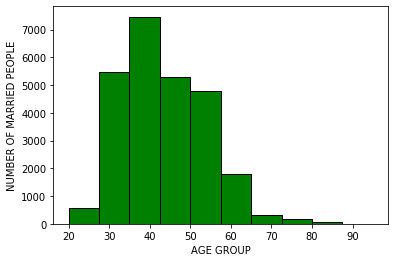

In [21]:
#### (a) Your code here

import matplotlib.pyplot as plt

df[df.marital=='married']['age'].plot.hist(edgecolor='k',color='green')

plt.ylabel('NUMBER OF MARRIED PEOPLE')
plt.xlabel('AGE GROUP')


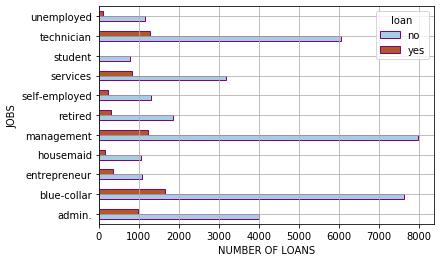

In [88]:
#### (b) Your code here

df.groupby('job').loan.value_counts().unstack().plot.barh(colormap='Paired',edgecolor='purple')

plt.ylabel('JOBS')
plt.xlabel('NUMBER OF LOANS')
plt.grid(zorder=0)


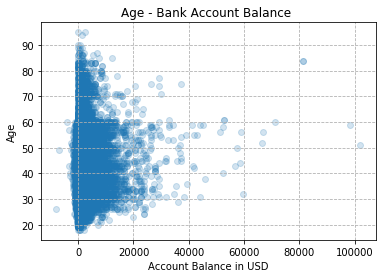

In [129]:
#### (c) Your code here

#df=df.sort_values(by='age')
plt.scatter(df['balance'], df['age'],alpha=0.2)
#plt.plot(df['age'], df['balance'])
plt.title('Age - Bank Account Balance ')
plt.xlabel('Account Balance in USD')
plt.ylabel('Age')
plt.grid(linestyle='--')

Text(0.5, 1.0, 'MARRIED -- AGE DISTRIBUTION')

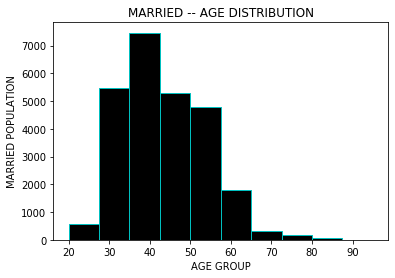

In [149]:
#### (d) Your code here


df[df.marital=='married']['age'].plot.hist(edgecolor='c',color='black')

plt.ylabel('MARRIED POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - MARRIED')


Text(0.5, 1.0, 'AGE DISTRIBUTION - DIVORCED')

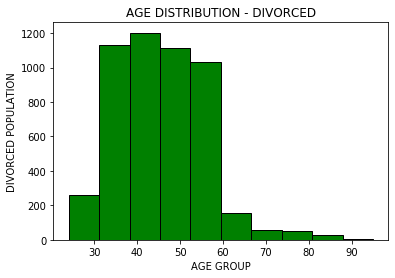

In [155]:
df[df.marital=='divorced']['age'].plot.hist(edgecolor='k',color='green')

plt.ylabel('DIVORCED POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - DIVORCED')

Text(0.5, 1.0, 'AGE DISTRIBUTION - SINGLE')

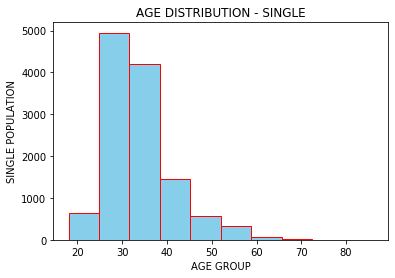

In [158]:
df[df.marital=='single']['age'].plot.hist(edgecolor='r',color='skyblue')

plt.ylabel('SINGLE POPULATION')
plt.xlabel('AGE GROUP')
plt.title('AGE DISTRIBUTION - SINGLE')